In [ ]:
!nvidia-smi -L

: 

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

: 

In [6]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()
#เรียกโหลด dataset สำเร็จรูปที่ชื่อว่า mnist
#ข้อมูลส่วนนึง เราจะเอามา train model และก็ต้องแบ่งไว้อีกส่วนหนึ่งสำหรับ test model
#เพื่อให้แน่ใจว่า model ใช้งานได้ ก็ต้องกั๊กข้อมูลไว้ test บ้าง

11501568/11490434 [==============================] - 2s 0us/step


In [7]:
print("x คือ input ที่ใช้ train model")
print("x_train :", x_train.shape, x_train.dtype, np.min(x_train), np.max(x_train))
print("x_test :", x_test.shape, x_test.dtype, np.min(x_test), np.max(x_test))

print("y คือ ผลลัพท์ กรณีนี้มนุษย์เตรียมให้ สำหรับเรียนรู้ ถ้าทำเองก็ไม่ต้องมี y ให้ x predict y แล้วค่อยมาตรวจสอบอีกที")
print("y_train :", y_train.shape, y_train.dtype, np.min(y_train), np.max(y_train))
print("y_test :",y_test.shape, y_test.dtype, np.min(y_test), np.max(y_test))

x คือ input ที่ใช้ train model
x_train : (60000, 28, 28) uint8 0 255
x_test : (10000, 28, 28) uint8 0 255
y คือ ผลลัพท์ กรณีนี้มนุษย์เตรียมให้ สำหรับเรียนรู้ ถ้าทำเองก็ไม่ต้องมี y ให้ x predict y แล้วค่อยมาตรวจสอบอีกที
y_train : (60000,) uint8 0 9
y_test : (10000,) uint8 0 9


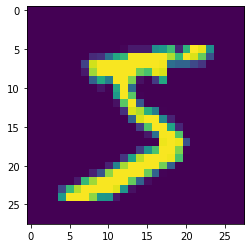

5


In [8]:
plt.imshow(x_train[0]) #ดูรูปแรกที่โหลดมาของ x_train
plt.show()
print(y_train[0]) #ดูเฉลย

In [9]:
#เตรียม data ให้พร้อมทำ deep learning

x_train_np = x_train/255
x_test_np = x_test/255
#เป็นการ scaling
# deeplearning จะชอบแบบนี้ (ค่าทศนิยม)

x_train_np = np.reshape(x_train_np, (-1,28*28)) #เปลี่ยนภาพ 28*28 ให้เป็นภาพแนวเส้นตรง
x_test_np = np.reshape(x_test_np, (-1,28*28))

x_train_np = x_train_np.astype(np.float32) #เปลี่ยน type ให้เป็น float32, deep learning จะเข้าใจมากกว่า
x_test_np = x_test_np.astype(np.float32)

print("x_train_np :", x_train_np.shape, x_train_np.dtype, np.min(x_train_np), np.max(x_train_np))
print("x_test_np :", x_test_np.shape, x_test_np.dtype, np.min(x_test_np), np.max(x_test_np))

x_train_np : (60000, 784) float32 0.0 1.0
x_test_np : (10000, 784) float32 0.0 1.0


In [10]:
#สร้าง model

model = tf.keras.Sequential()

#layer แรก
model.add(tf.keras.layers.Input((28*28,)))
#ยังไม่ได้ดูว่าทำไมต้องมี , หลัง 28*28

#hidden layer
model.add(tf.keras.layers.Dense(64, activation='relu')) #ยังไม่รู้ว่าทำไมต้องมี relu
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
#layer2 จะมี 64 node, layer3 จะมี 128 node
#ไม่มีกฏตายตัวว่า hidden layer ต้องมีกี่ node เราสามารถเปลี่ยนได้ตามใจ

#output layer (ต้องการ output 10)
model.add(tf.keras.layers.Dense(10, activation='softmax')) #ไม่รู้ว่าทำเป็น softmax

#train model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 67,466
Trainable params: 67,466
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

#train model
model.fit(x_train_np, y_train, epochs=10, batch_size=128, validation_data=(x_test_np, y_test))
#epochs = เทรนกี่รอบ
#validation_data = โยนข้อมูลไปทดสอบด้วย

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3581 - acc: 0.8970 - val_loss: 0.1629 - val_acc: 0.9527
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1409 - acc: 0.9589 - val_loss: 0.1297 - val_acc: 0.9623
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1004 - acc: 0.9699 - val_loss: 0.1208 - val_acc: 0.9637
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0785 - acc: 0.9753 - val_loss: 0.0951 - val_acc: 0.9685
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0633 - acc: 0.9804 - val_loss: 0.0911 - val_acc: 0.9729
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0509 - acc: 0.9841 - val_loss: 0.0827 - val_acc: 0.9747
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0437 - acc: 0.9860 - val_loss: 0.0903 - val_acc: 0.9754
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.

In [12]:
y_pred = model.predict(np.reshape(x_test_np[0],(1,28*28)))
print(y_pred)

#output ค่าไหนเยอะสุด ค่านั้นคือคำตอบ (จะเห็นว่าเป็นค่าที่สาม จากหลังสุด = 9.9999738e-01)

[[9.5431560e-08 1.6904304e-09 1.8883020e-07 3.5645858e-06 7.3629736e-10
  1.0387276e-10 4.4684976e-12 9.9999189e-01 1.2476993e-08 4.2500315e-06]]
